## EDA on Iris Flower

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the Dataset

In [3]:
import pandas as pd
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Perform Basic Data Quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.duplicated().sum()

0

## Descriptive Analytics

Datatypes

In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Statistics

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
sepal_width,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
petal_length,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
petal_width,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


## Data Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Species Pie chart'}, ylabel='count'>

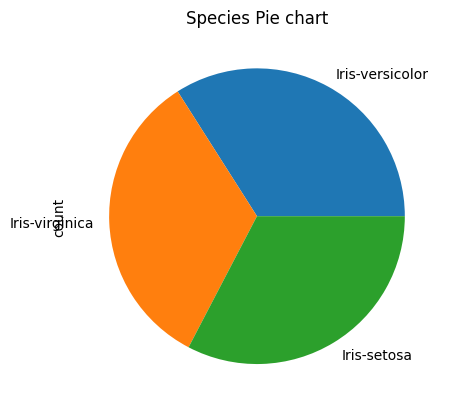

In [17]:
df['species'].value_counts().plot(kind='pie',title='Species Pie chart')

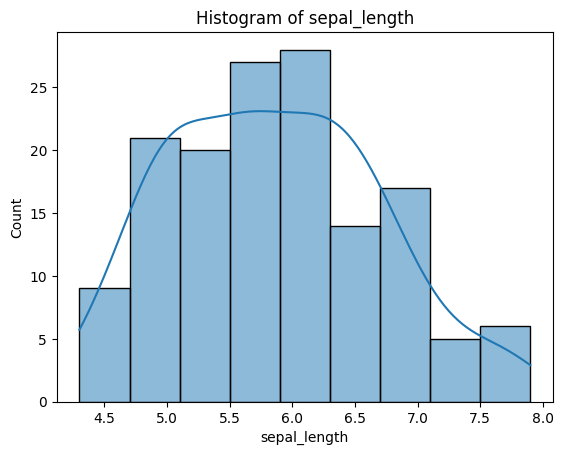

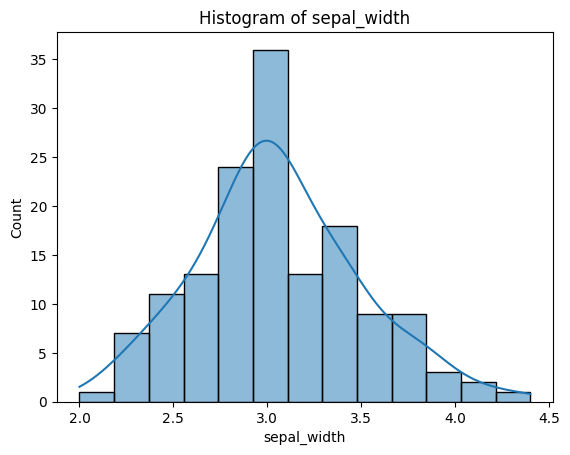

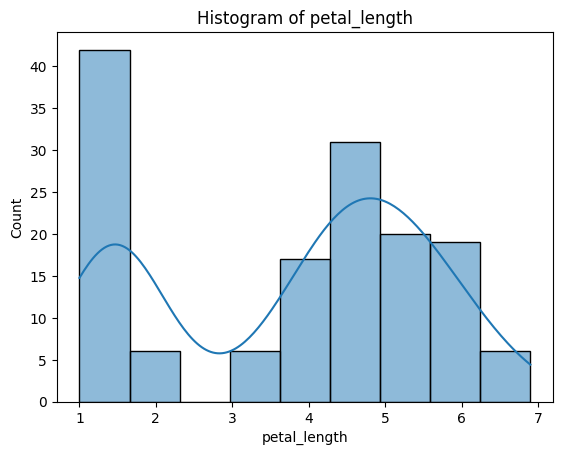

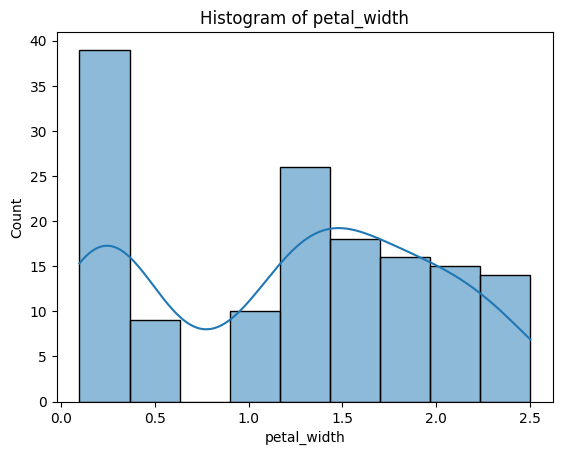

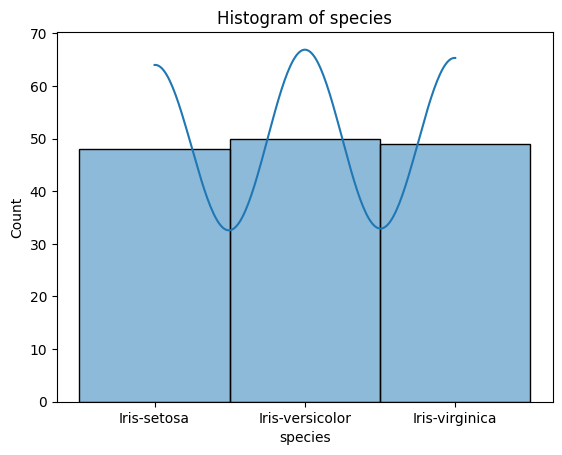

In [13]:
for i in df.columns:
    sns.histplot(df,x=i,kde=True)
    plt.title(f'Histogram of {i}')
    plt.show()

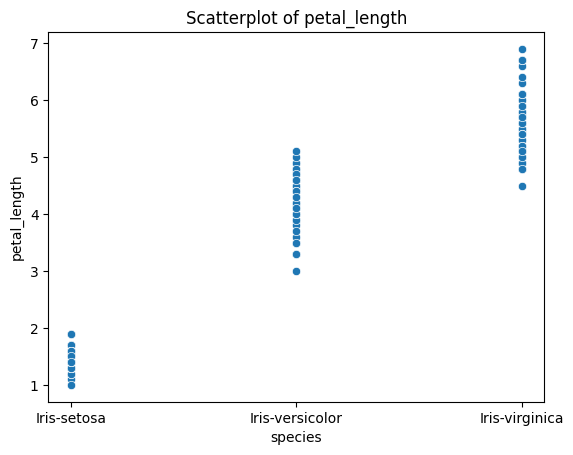

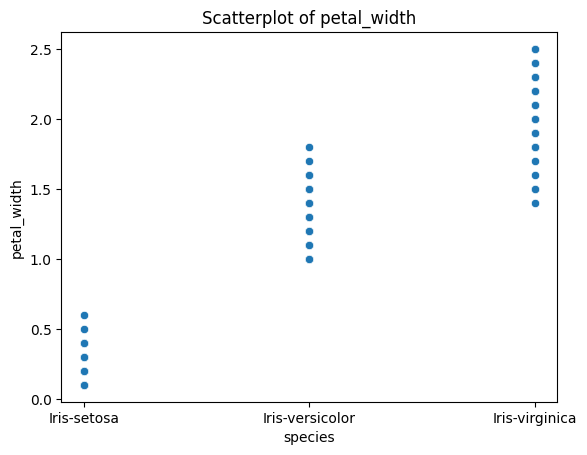

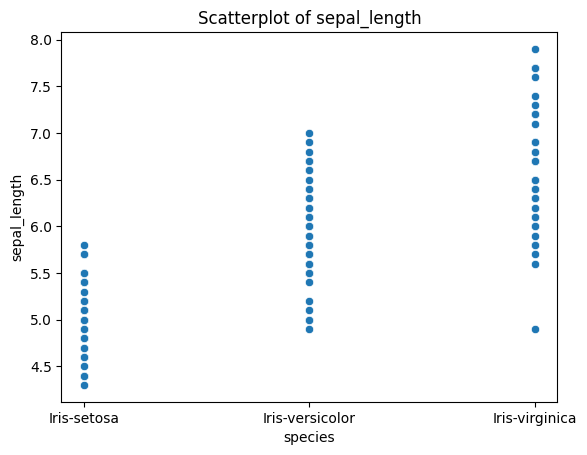

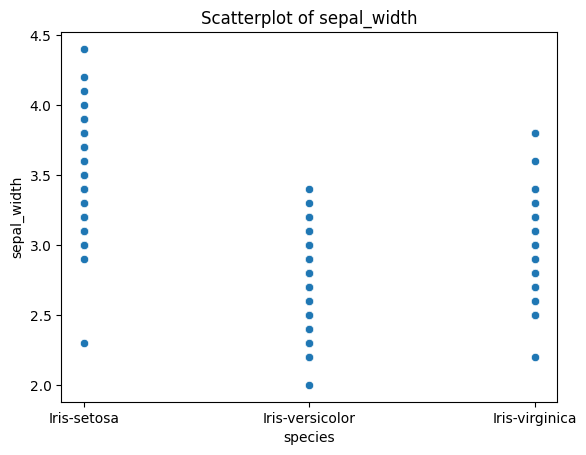

In [23]:
con = ['petal_length','petal_width','sepal_length','sepal_width']
for i in con:
    sns.scatterplot(df,x='species',y=i)
    plt.title(f'Scatterplot of {i}')
    plt.show()

In [24]:
df[con].corr()

,petal_length,petal_width,sepal_length,sepal_width
petal_length,1.000000,0.961883,0.871305,-0.421057
petal_width,0.961883,1.000000,0.817058,-0.356376
sepal_length,0.871305,0.817058,1.000000,-0.109321
sepal_width,-0.421057,-0.356376,-0.109321,1.000000


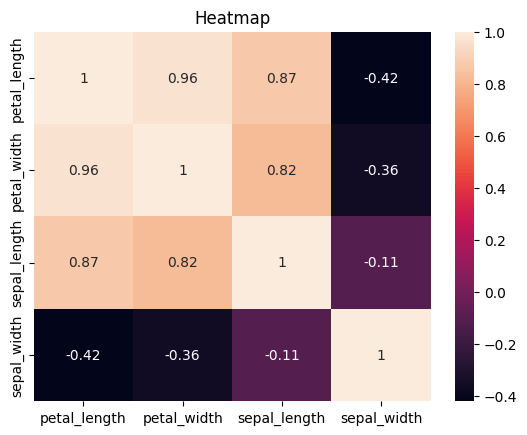

In [25]:
sns.heatmap(df[con].corr(),annot=True)
plt.title('Heatmap')
plt.show()

From above heatmap, we can observe that the petal data and sepal data are correlated.

Lets plot scatterplots and understand these features better

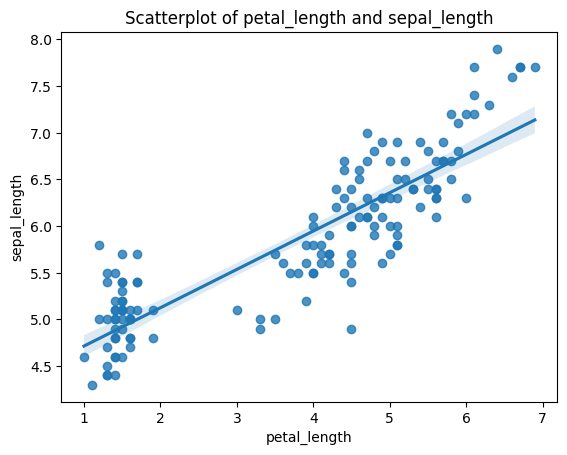

In [32]:
sns.regplot(df,x='petal_length',y='sepal_length')
plt.title(f'Scatterplot of petal_length and sepal_length')
plt.show()

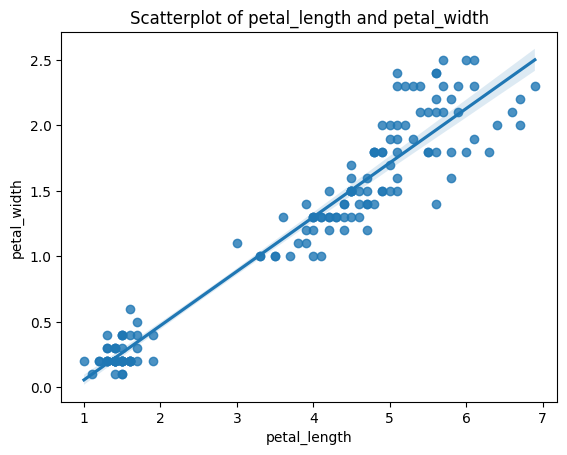

In [33]:
sns.regplot(df,x='petal_length',y='petal_width')
plt.title(f'Scatterplot of petal_length and petal_width')
plt.show()

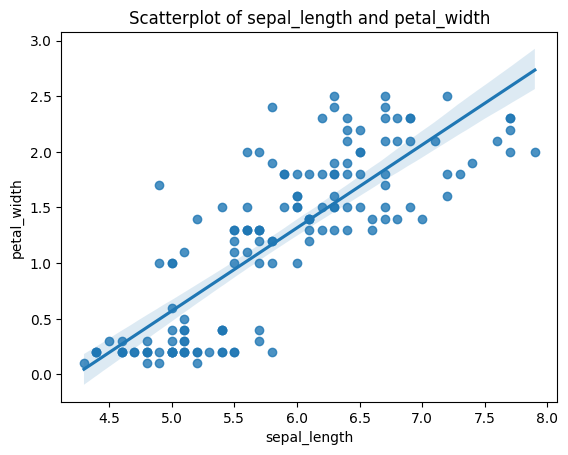

In [34]:
sns.regplot(df,x='sepal_length',y='petal_width')
plt.title(f'Scatterplot of sepal_length and petal_width')
plt.show()

## Observations
We can categorize Iris flower species based on the above observations:

| Species  | Petal Length | Petal Width | Sepal length | Sepal width |
|:--------:|:------------:|:-----------:|:------------:|:-----------:|
|Setosa    |  1 - 2       |  0.1 -0.6   |  4.25 - 5.75 |  2.8 -4.4   |
|Versicolor|  3 - 5       |  1 - 1.8    |  4.8 - 7     |  2 - 3.4    |
|Virginica |  4.5 - 7     |  1.4 - 2.5  |  5.5 - 8     |  2.5 - 3.75 |

petal length of the species has good linear relationship with petal width and sepal length

sepal length and petal width have good linear relationship